Question 1: Python Basics and Data Manipulation
Objective: Demonstrate basic Python skills and data manipulation using Pandas.

Task:

Load a given CSV file containing metal prices into a Pandas DataFrame.
Filter the data to include only 'Copper' and 'Zinc' for the year 2021.
Calculate the average price per month for each metal and plot it.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("../data/MarketData.csv",skiprows=6)

In [76]:
df.head(5)

,Dates,PX_SETTLE,PX_SETTLE.1,PX_SETTLE.2,PX_SETTLE.3,PX_SETTLE.4,PX_SETTLE.5
0,01/01/2010,7375.0,2230.0,2560.0,2432.0,16950,79.36
1,04/01/2010,7500.0,2267.0,2574.0,2515.0,17450,81.51
2,05/01/2010,7485.0,2302.0,2575.0,2522.5,17375,81.77
3,06/01/2010,7660.0,2377.0,2718.0,2680.0,17825,83.18
4,07/01/2010,7535.0,2310.0,2607.0,2599.0,17475,82.66


In [77]:
df.rename(columns={'PX_SETTLE': 'Copper', 'PX_SETTLE.2': 'Zinc'}, inplace=True) #rename columns with copper and zinc prices
df = df[['Dates','Copper','Zinc']] #keep only these columns
df['Dates'] = pd.to_datetime(df['Dates'],dayfirst=True)  #convert dates column to datetime type
df = df[(df['Dates'].dt.year == 2021)] #filter to only include 2021 year

In [78]:
df['Month'] = df['Dates'].dt.month #Create a 'Month' column from the 'Dates' column
average_prices = df.groupby(['Month'])[['Copper', 'Zinc']].mean().reset_index() #group by 'Month' and calculate the average price for each metal
average_prices.head() #display the average prices per month

,Month,Copper,Zinc
0,1,7968.690476,2730.023810
1,2,8450.150000,2762.375000
2,3,8974.586957,2809.369565
3,4,9267.500000,2841.159091
4,5,10162.357143,2982.571429


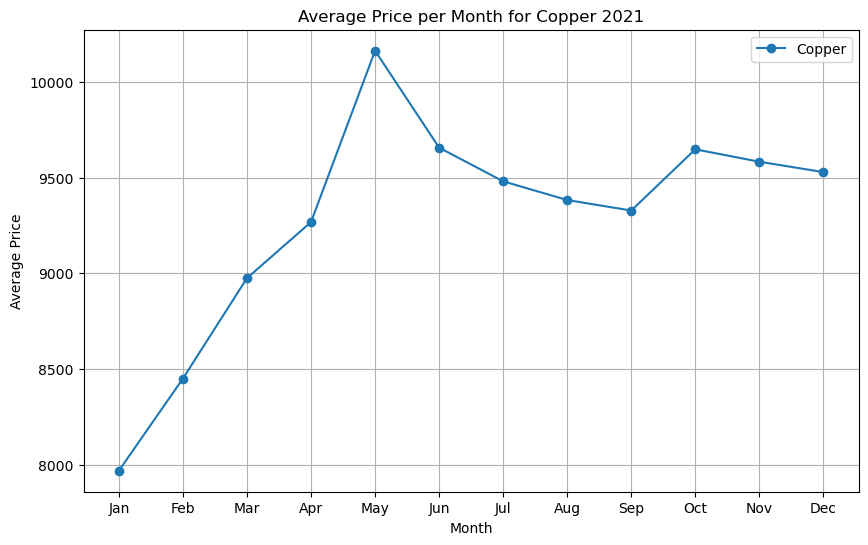

In [83]:
# Plot the average prices for Copper and Zinc
plt.figure(figsize=(10, 6))
plt.plot(average_prices['Month'], average_prices['Copper'], label='Copper', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price per Month for Copper 2021')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

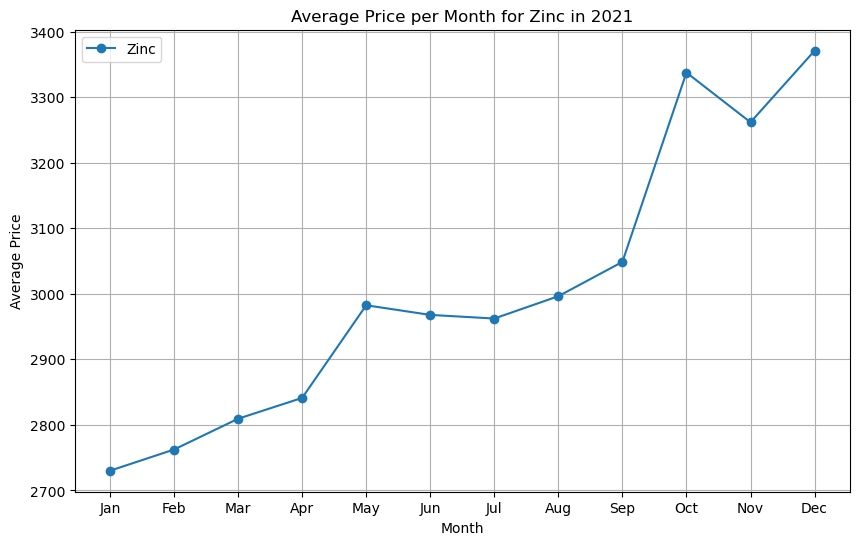

In [84]:
# Plot the average prices for Copper and Zinc
plt.figure(figsize=(10, 6))
plt.plot(average_prices['Month'], average_prices['Zinc'], label='Zinc', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price per Month for Zinc in 2021')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()